In [1]:
## APPROACH

## Load data 
## data preprocessing
## Missing Value Analysis
## Outlier Analysis
## Feature Selection
## Model Building
## trying different Algos
## Model finalisation
## saving the file


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv('day.csv')

# Problem statement -
The objective of this Case is to Predication of bike rental count on daily based on the
environmental and seasonal settings.


The details of data attributes in the dataset are as follows -

instant: Record index

dteday: Date

season: Season (1:springer, 2:summer, 3:fall, 4:winter)

yr: Year (0: 2011, 1:2012)

mnth: Month (1 to 12)

hr: Hour (0 to 23)

holiday: weather day is holiday or not (extracted fromHoliday Schedule)

weekday: Day of the week

workingday: If day is neither weekend nor holiday is 1, otherwise is 0.

weathersit: (extracted fromFreemeteo)

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered
clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: Normalized temperature in Celsius. The values are derived via
(t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)

atemp: Normalized feeling temperature in Celsius. The values are derived via
(t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)

hum: Normalized humidity. The values are divided to 100 (max)

windspeed: Normalized wind speed. The values are divided to 67 (max)

casual: count of casual users

registered: count of registered users

cnt: count of total rental bikes including both casual and registered

In [4]:
## Checking top five rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
## Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
## Checking columns
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
## Checking shape of the data 
data.shape

(731, 16)

In [169]:
## checking the min,max,mean,median quantile25,quantile50,quantile75 of numeric values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,731.0,1.518468,1.122925,0.000000,1.000000,2.000000,3.000000,3.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
hum,731.0,0.628780,0.140436,0.207291,0.521041,0.627500,0.730209,0.972500
windspeed,731.0,0.189846,0.075644,0.022392,0.134950,0.180975,0.233214,0.380611


In [9]:
## dropping the duplicate index
data=data.drop('instant',1)

In [10]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [11]:
## Extracting date from the date variable we might want to use it later 
data['day']=data['dteday'].apply(lambda x:x.split('-')[2])

In [12]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,01
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,02
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,03
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,04
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [13]:
## converting data to character from for season
data['season']=data['season'].map({1:'springer',2:'summer',3:'fall',4:'winter'})

In [14]:
data

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,2011-01-01,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,01
1,2011-01-02,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,02
2,2011-01-03,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,03
3,2011-01-04,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,04
4,2011-01-05,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,2012-12-27,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,2012-12-28,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,2012-12-29,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,2012-12-30,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [15]:
## checking variation in season with respect to target variable
data.groupby('season')['cnt'].agg('mean')

season
fall        5644.303191
springer    2604.132597
summer      4992.331522
winter      4728.162921
Name: cnt, dtype: float64

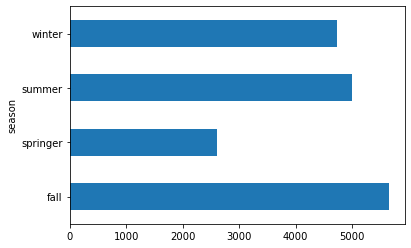

In [16]:
data.groupby('season')['cnt'].agg('mean').plot(kind='barh')
xlabel='Mean of count'
plt.savefig('season vs mean count.jpeg')

In [17]:
## bike rentals has seasonal effects we see that springer season has less rentals compaired all other seasons and 
## fall has the higest rentals followed by summer and winter seasons

In [18]:
## Checking if rentals are same on all days or if any particular day rentals are very high 
data.groupby('day')['cnt'].agg('mean')

day
01    4320.500000
02    4390.875000
03    4648.375000
04    4680.625000
05    4546.458333
06    4525.000000
07    4395.250000
08    4282.083333
09    4501.708333
10    4651.875000
11    4631.083333
12    4552.375000
13    4643.666667
14    4683.583333
15    4819.875000
16    4576.541667
17    4927.291667
18    4518.208333
19    4599.458333
20    4779.041667
21    4363.125000
22    4119.291667
23    4435.166667
24    4316.916667
25    4366.708333
26    4431.666667
27    4281.083333
28    4409.666667
29    4159.521739
30    4538.409091
31    4544.642857
Name: cnt, dtype: float64

In [19]:
## there is not much variation in the days of the month of the bike rentals even the standard deviation is less.

In [20]:
## Checking year wise mean sales 
data.groupby('yr')['cnt'].agg('mean')

yr
0    3405.761644
1    5599.934426
Name: cnt, dtype: float64

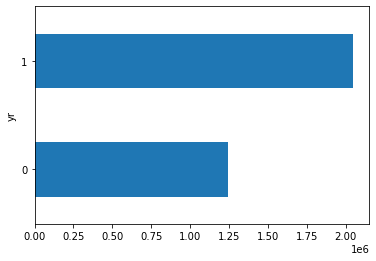

In [21]:
data.groupby('yr')['cnt'].agg('sum').plot(kind='barh')
plt.savefig('yr vs count.jpeg')

In [22]:
## There is a variation in the yr column company rentals has grown in 2012 compaired with the presiding year growth is over 60%

In [23]:
data.groupby('holiday')['cnt'].agg('sum')

holiday
0    3214244
1      78435
Name: cnt, dtype: int64

<AxesSubplot:ylabel='cnt'>

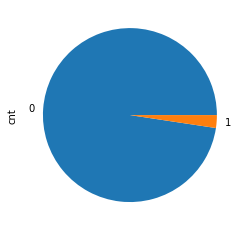

In [24]:
data.groupby('holiday')['cnt'].agg('sum').plot(kind='pie')

In [25]:
### Rentals are less on a holiday compaired with a non holiday 

In [26]:
data.groupby('mnth')['cnt'].agg('mean').sort_values(ascending=False)

mnth
6     5772.366667
9     5766.516667
8     5664.419355
7     5563.677419
5     5349.774194
10    5199.225806
4     4484.900000
11    4247.183333
3     3692.258065
12    3403.806452
2     2655.298246
1     2176.338710
Name: cnt, dtype: float64

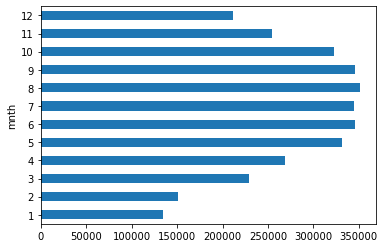

In [27]:
data.groupby('mnth')['cnt'].agg('sum').plot(kind='barh')
plt.savefig('month vs sum of monthly count.jpeg')

In [28]:
## we see some months have more rentals and some have less its a good candiate for rank encoding based on bike rentals 

In [29]:
#month=data['mnth'].map({6:11,9:10,8:9,7:8,5:7,10:6,4:5,11:4,3:3,12:2,2:1,1:0})

In [30]:
data.groupby('workingday')['cnt'].agg('sum')

workingday
0    1000269
1    2292410
Name: cnt, dtype: int64

In [31]:
data.groupby('weekday')['cnt'].agg('mean')

weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64

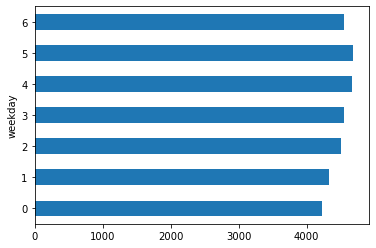

In [32]:
data.groupby('weekday')['cnt'].agg('mean').plot(kind='barh')
plt.savefig('weekday vs mean count of weekday.jpeg')

In [33]:
## we dont see and significant difference in rentals on working day and non working day

In [34]:
data.groupby('weathersit')['cnt'].agg('mean')
plt.savefig('weathersit vs mean count in particular weathersittings.jpeg')

<Figure size 432x288 with 0 Axes>

In [35]:
# we see that when the sky is clear we have the most rentals compaired with cloudy
## we have least rentals when we have light snow & light Rain & 
## we dont have info about the 4th category which is mentioned in the question 
## we dont have any data on it which is heavy snow & heavy rain

In [36]:
## Checking if any missing values in the data
data.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [37]:
## dropping the dteday variable as this dont add any meaning we have all the other variable of this column like day,mnth,yr
data=data.drop('dteday',1)

In [38]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt', 'day'],
      dtype='object')

In [39]:
cat_cols=['season','yr','mnth','holiday','weekday','workingday','weathersit']

In [40]:
num_cols=['temp','atemp','hum','windspeed','casual','registered','cnt']

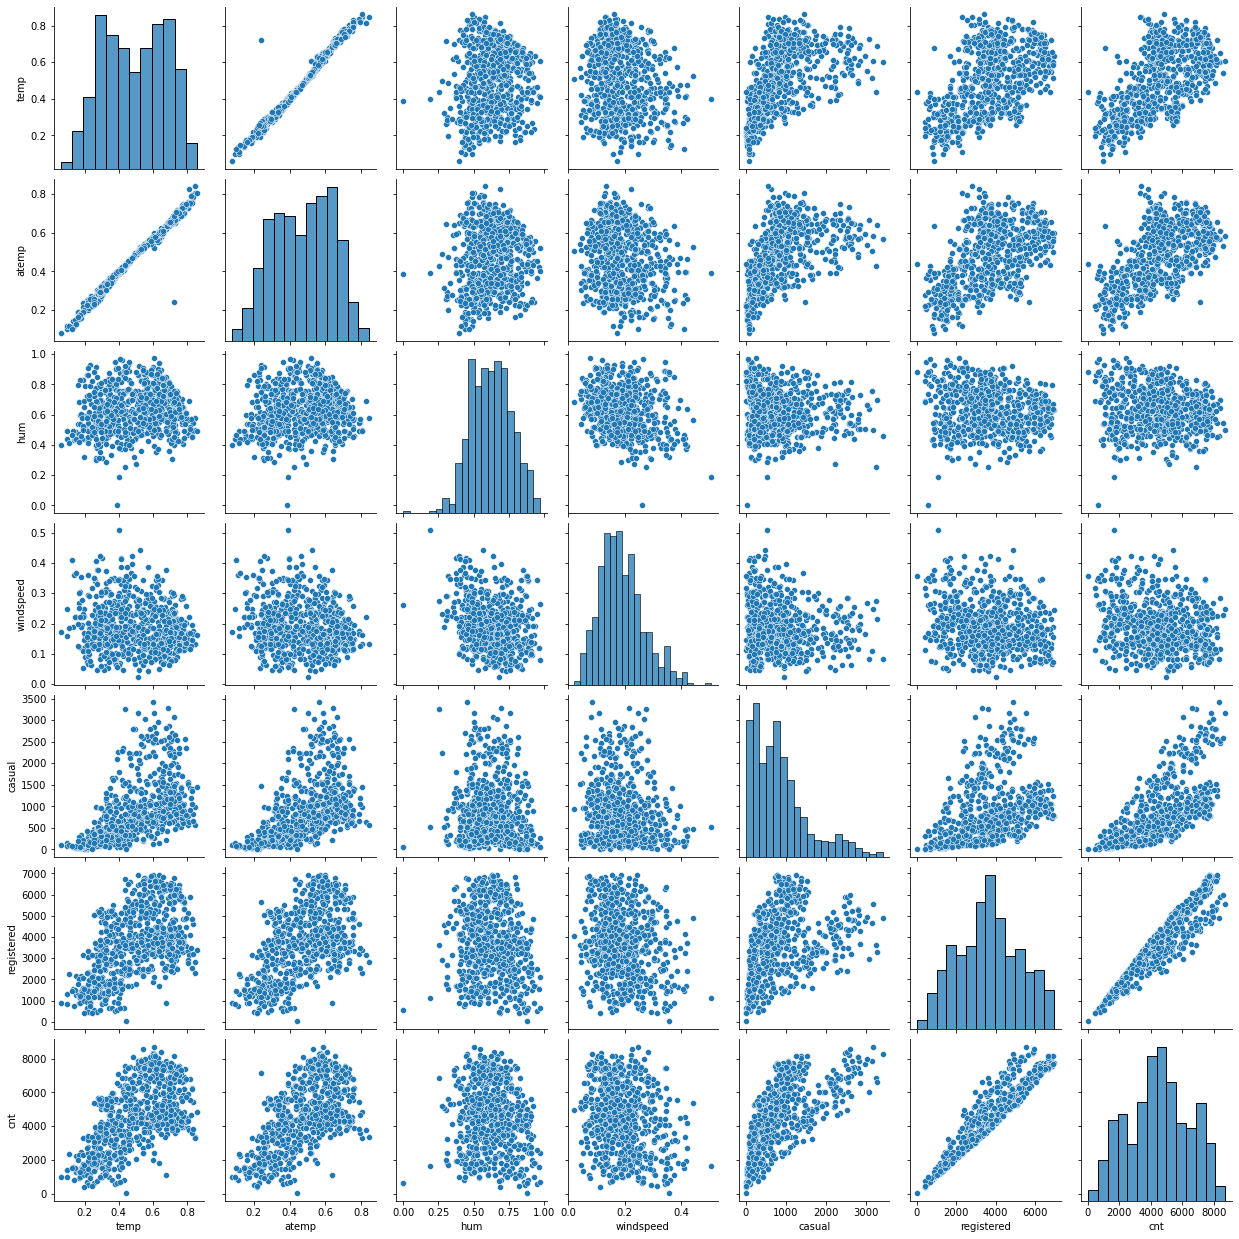

In [41]:
sns.pairplot(data=data[num_cols])
plt.savefig('pairplot.jpeg')

In [42]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,01
1,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,02
2,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,03
3,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,04
4,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30


In [43]:
## we will check the outliers and impute them

In [44]:
data.describe()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [45]:
## We have minimum in humidity which is zero but in real world humidity is never zero even in extreme conditions
## we are imputing that value with the mean of humidity 

In [46]:
data.at[68,'hum'] = data['hum'].mean()

In [47]:
## checking the imputed value
data.at[68,'hum']

0.6278940629274962

In [48]:
## Checking OUTLIERS
## imputing outliers with using quantile method for visualisation we will use box plot 
# for outliers and we will capping them on the lower and upper boundry 

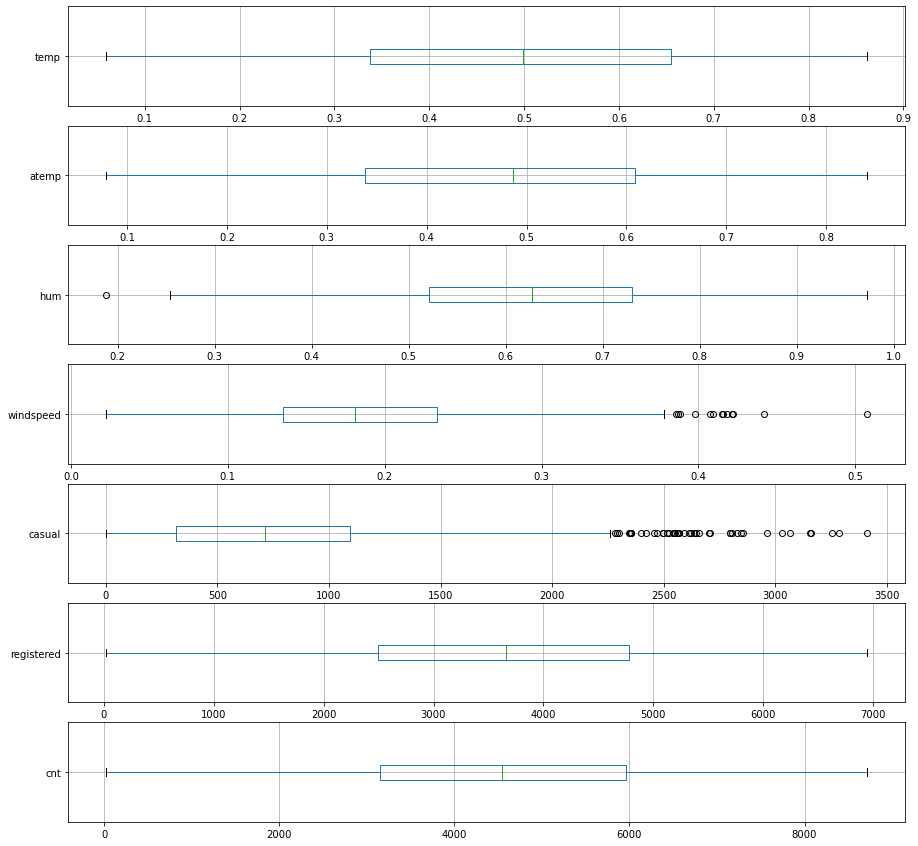

In [49]:
fig, axes = plt.subplots(7, 1, figsize=(15, 15))
for i, c in enumerate(num_cols):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)
plt.savefig('boxplot before outlier treatment.jpeg')

In [50]:
def outliers(df,columns):
    for num in columns:
        quantile_1,quantile_3=np.percentile(df[num],[25,75])
        
        IQR=quantile_3 - quantile_1
        
        lower_bound = quantile_1 - 1.5*IQR
        upper_bound = quantile_3 + 1.5*IQR
        
        print(num,lower_bound,upper_bound)
        
        df[num].loc[df[num] < lower_bound] = lower_bound
        df[num].loc[df[num] > upper_bound] = upper_bound

In [51]:
outliers(data,num_cols)

temp -0.14041600000000015 1.1329160000000003
atemp -0.06829675000000018 1.0147412500000002
hum 0.20729099999999978 1.043959
windspeed -0.012446750000000034 0.38061125
casual -855.25 2266.75
registered -922.25 8195.75
cnt -1054.0 10162.0


C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\Madhu\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

In [52]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,01
1,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,02
2,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,03
3,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,04
4,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114.0,27
727,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,3095.0,28
728,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341.0,29
729,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,1796.0,30


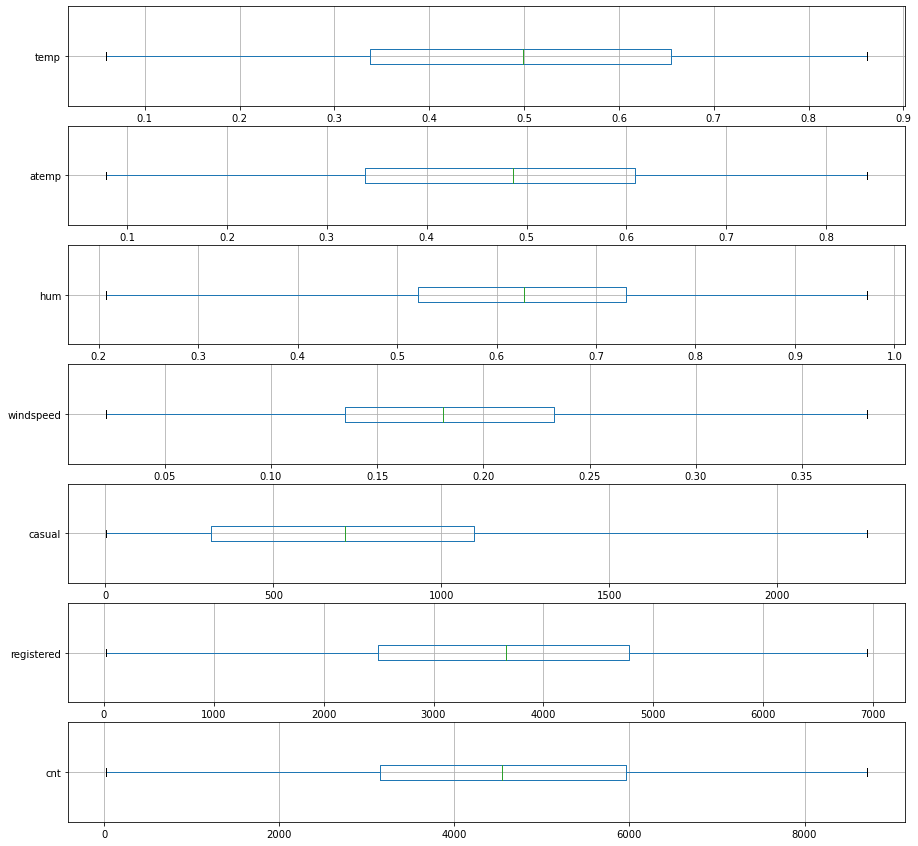

In [53]:
## just checking to make sure there are no outiers
fig, axes = plt.subplots(7, 1, figsize=(15, 15))
for i, c in enumerate(num_cols):
  _ = data[[c]].boxplot(ax=axes[i], vert=False)
plt.savefig('boxplot after outlier treatment.jpeg')

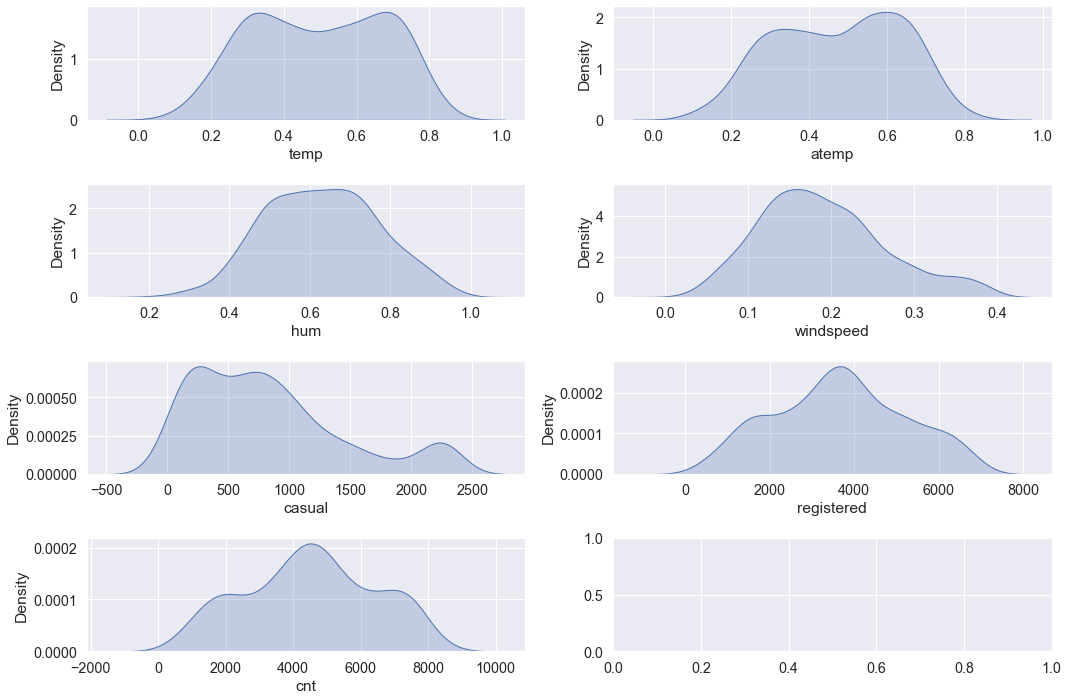

In [54]:
## Checking the distribution of the numeric variable
sns.set(font_scale=1.3)
fig, axes = plt.subplots(4, 2, figsize=(15, 10))
axes = [ax for axes_row in axes for ax in axes_row]
for i, c in enumerate(num_cols):
  plot = sns.kdeplot(data=data, x=c, ax=axes[i], fill=True)
plt.tight_layout()
plt.savefig('distribution plot.jpeg')

In [55]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,01
1,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,02
2,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,03
3,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,04
4,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114.0,27
727,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,3095.0,28
728,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341.0,29
729,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,1796.0,30


In [56]:
cat_cols=['yr','mnth','holiday','weekday','workingday','weathersit']

In [57]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,springer,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0,01
1,springer,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0,02
2,springer,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0,03
3,springer,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,1562.0,04
4,springer,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,1600.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,springer,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,2114.0,27
727,springer,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,3095.0,28
728,springer,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,1341.0,29
729,springer,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,1796.0,30


In [58]:
print(data.groupby('weathersit').count().reset_index())

   weathersit  season   yr  mnth  holiday  weekday  workingday  temp  atemp  \
0           1     463  463   463      463      463         463   463    463   
1           2     247  247   247      247      247         247   247    247   
2           3      21   21    21       21       21          21    21     21   

   hum  windspeed  casual  registered  cnt  day  
0  463        463     463         463  463  463  
1  247        247     247         247  247  247  
2   21         21      21          21   21   21  


In [59]:
data['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

<AxesSubplot:ylabel='season'>

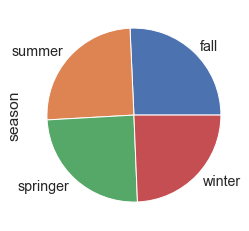

In [60]:
data['season'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='holiday'>

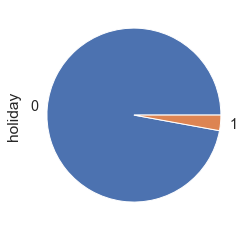

In [61]:
data['holiday'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='weekday'>

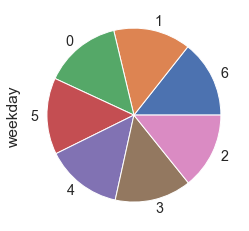

In [62]:
data['weekday'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='workingday'>

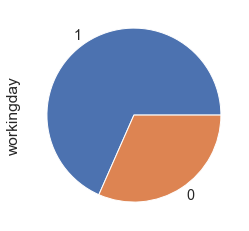

In [63]:
data['workingday'].value_counts().plot(kind='pie')

<AxesSubplot:ylabel='mnth'>

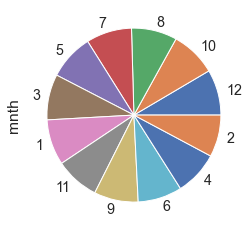

In [64]:
data['mnth'].value_counts().plot(kind='pie')

In [65]:
## checking number of unique elements in the data
data.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          499
atemp         690
hum           595
windspeed     638
casual        565
registered    679
cnt           696
day            31
dtype: int64

In [66]:
data['holiday'].value_counts()

0    710
1     21
Name: holiday, dtype: int64

In [67]:
data[data['holiday']==1]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
16,springer,0,1,1,1,0,2,0.175833,0.176771,0.537500,0.194017,117.00,883.0,1000.0,17
51,springer,0,2,1,1,0,2,0.303333,0.284075,0.605000,0.307846,195.00,912.0,1107.0,21
104,summer,0,4,1,5,0,1,0.446667,0.441913,0.671250,0.226375,642.00,2484.0,3126.0,15
149,summer,0,5,1,1,0,1,0.733333,0.671092,0.685000,0.131225,1549.00,2549.0,4098.0,30
184,fall,0,7,1,1,0,2,0.726667,0.665417,0.637917,0.081479,2266.75,2978.0,6043.0,04
247,fall,0,9,1,1,0,2,0.673333,0.625646,0.790417,0.212696,1236.00,2115.0,3351.0,05
282,winter,0,10,1,1,0,1,0.570833,0.542925,0.733750,0.042304,1514.00,3603.0,5117.0,10
314,winter,0,11,1,5,0,1,0.324167,0.306817,0.446250,0.314675,440.00,2928.0,3368.0,11
327,winter,0,11,1,4,0,1,0.373333,0.372471,0.549167,0.167304,560.00,935.0,1495.0,24
359,springer,0,12,1,1,0,1,0.321739,0.315535,0.506957,0.239465,430.00,887.0,1317.0,26


In [68]:
cat_cols=['season','yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit','day']

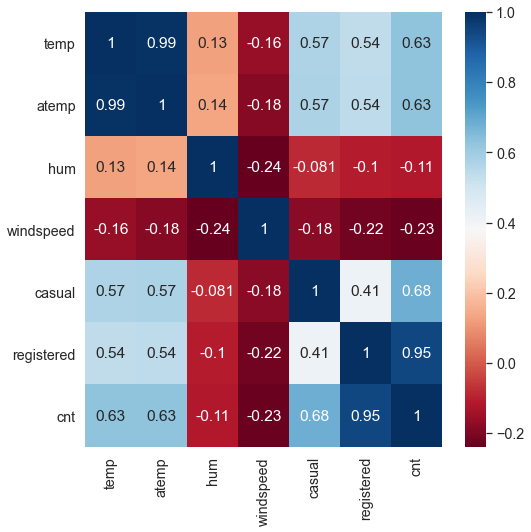

<Figure size 432x288 with 0 Axes>

In [69]:
## Plotting correlation plot
corr=data[num_cols].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap='RdBu',annot=True)
plt.show()
plt.savefig('correlation plot.jpeg')

In [70]:
## temp and atemp are highly correlated with each other we can drop any one of them or we can combine them
## casual and registered are highly correlated and put together is our target column cnt so we can remove this columns 

In [71]:
#data['mean_temp']=(data['temp'] + data['atemp']) / 2
data=data.drop('atemp',1)

In [72]:
data=data.drop(['casual','registered'],1)

In [73]:
## Updating num_cols 
num_cols=['temp','hum','windspeed','cnt']

In [74]:
data

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,springer,0,1,0,6,0,2,0.344167,0.805833,0.160446,985.0,01
1,springer,0,1,0,0,0,2,0.363478,0.696087,0.248539,801.0,02
2,springer,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349.0,03
3,springer,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562.0,04
4,springer,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600.0,05
...,...,...,...,...,...,...,...,...,...,...,...,...
726,springer,1,12,0,4,1,2,0.254167,0.652917,0.350133,2114.0,27
727,springer,1,12,0,5,1,2,0.253333,0.590000,0.155471,3095.0,28
728,springer,1,12,0,6,0,2,0.253333,0.752917,0.124383,1341.0,29
729,springer,1,12,0,0,0,1,0.255833,0.483333,0.350754,1796.0,30


In [75]:
data['season']=data['season'].map({'springer':0,'summer':2,'fall':3,'winter':1})

In [ ]:
## encoding the season with respect to rentals falls have higest rentals we have given them 3 and
## springer has lowest rentals we have given it zero 

In [76]:
#data['mnth'] = data['mnth'].map({6:11,9:10,8:9,7:8,5:7,10:6,4:5,11:4,3:3,12:2,2:1,1:0})

In [77]:
cat_cols=['mnth','yr','weekday','weathersit','holiday','workingday']

In [78]:
num_cols=['temp','season','hum','windspeed','cnt']

In [79]:
feat=cat_cols + num_cols

In [80]:
df=data[feat]

In [81]:
df

,mnth,yr,weekday,weathersit,holiday,workingday,temp,season,hum,windspeed,cnt
0,1,0,6,2,0,0,0.344167,0,0.805833,0.160446,985.0
1,1,0,0,2,0,0,0.363478,0,0.696087,0.248539,801.0
2,1,0,1,1,0,1,0.196364,0,0.437273,0.248309,1349.0
3,1,0,2,1,0,1,0.200000,0,0.590435,0.160296,1562.0
4,1,0,3,1,0,1,0.226957,0,0.436957,0.186900,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
726,12,1,4,2,0,1,0.254167,0,0.652917,0.350133,2114.0
727,12,1,5,2,0,1,0.253333,0,0.590000,0.155471,3095.0
728,12,1,6,2,0,0,0.253333,0,0.752917,0.124383,1341.0
729,12,1,0,1,0,0,0.255833,0,0.483333,0.350754,1796.0


In [82]:
## We are using onehot encoding on the categorical variables
df=pd.get_dummies(df,columns=cat_cols,drop_first=True)

In [83]:
## spilitting the data into X,y
y=df['cnt']
X=df.drop('cnt',1)

In [84]:
X.shape,y.shape

((731, 26), (731,))

In [85]:
df

,temp,season,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3,holiday_1,workingday_1
0,0.344167,0,0.805833,0.160446,985.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0.363478,0,0.696087,0.248539,801.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.196364,0,0.437273,0.248309,1349.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.200000,0,0.590435,0.160296,1562.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,0.226957,0,0.436957,0.186900,1600.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.254167,0,0.652917,0.350133,2114.0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
727,0.253333,0,0.590000,0.155471,3095.0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
728,0.253333,0,0.752917,0.124383,1341.0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
729,0.255833,0,0.483333,0.350754,1796.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score

In [87]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [88]:
model=LinearRegression()

In [ ]:
## Splitting the data into train ,test

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [90]:
model.fit(X_train,y_train)

LinearRegression()

In [91]:
## predctions using Linear regression
pred=model.predict(X_test)

In [92]:
## Checking evaluation metrics 
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_percent_error:',mean_absolute_percentage_error(y_test,pred))

mean_absolute_error: 574.3327583114503
mean_squared_error: 828.4420639669352
R2 Score: 0.8142862187080153
mean_absolute_percent_error: 19.85130515884278


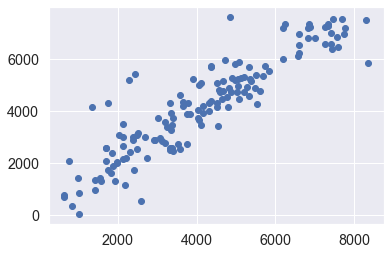

In [93]:
plt.scatter(y_test,pred)
plt.savefig('scatter plot LR model.jpeg')

In [94]:
## Using Decision Tree
from sklearn.tree import DecisionTreeRegressor

In [95]:
dtr = DecisionTreeRegressor()

In [96]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [97]:
pred=dtr.predict(X_test)

In [98]:
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_percent_error:',mean_absolute_percentage_error(y_test,pred))

mean_absolute_error: 539.4625850340136
mean_squared_error: 745.9714435270448
R2 Score: 0.8494210536508334
mean_absolute_percent_error: 18.833048019834646


In [99]:
## We will try Random Forest Regressor

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rf=RandomForestRegressor(n_estimators=500)

In [102]:
rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=500)

In [103]:
pred=rf.predict(X_test)

In [104]:
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_percent_error:',mean_absolute_percentage_error(y_test,pred))

mean_absolute_error: 411.99103401360543
mean_squared_error: 601.8937813024243
R2 Score: 0.9019698739087262
mean_absolute_percent_error: 15.443401561033369


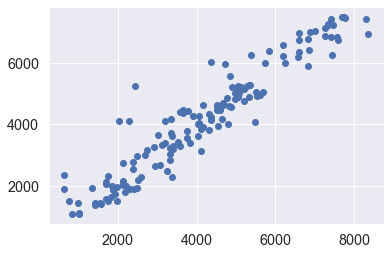

In [105]:
plt.scatter(y_test,pred)

In [106]:
## tried different parameters and n_estimators = 500 gave me best score

In [ ]:
## we will use XGRegressor

In [107]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [108]:
xg=XGBRegressor()

In [109]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
pred=xg.predict(X_test)

In [111]:
print('mean_absolute_error:',mean_absolute_error(y_test,pred))
print('mean_squared_error:',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score:',r2_score(y_test,pred))
print('mean_absolute_percent_error:',mean_absolute_percentage_error(y_test,pred))

mean_absolute_error: 396.85834196960036
mean_squared_error: 593.2296735914333
R2 Score: 0.9047717986182285
mean_absolute_percent_error: 15.46292004684503


In [112]:
eval_set=[(X_test,y_test)]

In [113]:
xg.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='mae',eval_set=eval_set,verbose=True)

[0]	validation_0-mae:2918.78857
Will train until validation_0-mae hasn't improved in 10 rounds.
[1]	validation_0-mae:2073.65479
[2]	validation_0-mae:1528.75684
[3]	validation_0-mae:1152.14038
[4]	validation_0-mae:896.66125
[5]	validation_0-mae:730.83447
[6]	validation_0-mae:621.29950
[7]	validation_0-mae:543.27838
[8]	validation_0-mae:494.41974
[9]	validation_0-mae:463.29343
[10]	validation_0-mae:445.97024
[11]	validation_0-mae:435.14105
[12]	validation_0-mae:424.49820
[13]	validation_0-mae:418.60821
[14]	validation_0-mae:413.41534
[15]	validation_0-mae:412.32025
[16]	validation_0-mae:408.12811
[17]	validation_0-mae:406.03714
[18]	validation_0-mae:407.39313
[19]	validation_0-mae:407.18149
[20]	validation_0-mae:406.78571
[21]	validation_0-mae:406.08624
[22]	validation_0-mae:405.11661
[23]	validation_0-mae:405.20096
[24]	validation_0-mae:404.26239
[25]	validation_0-mae:405.85565
[26]	validation_0-mae:406.29352
[27]	validation_0-mae:403.66266
[28]	validation_0-mae:405.34943
[29]	validatio

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [114]:
mean_absolute_percentage_error(y_test,pred)

15.46292004684503

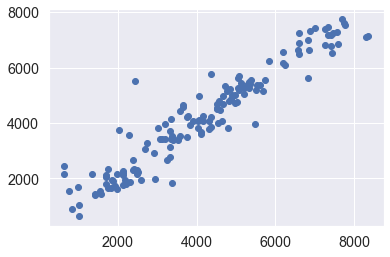

In [115]:
plt.scatter(y_test,pred)
plt.savefig('scatter plot XGRegression.jpeg')

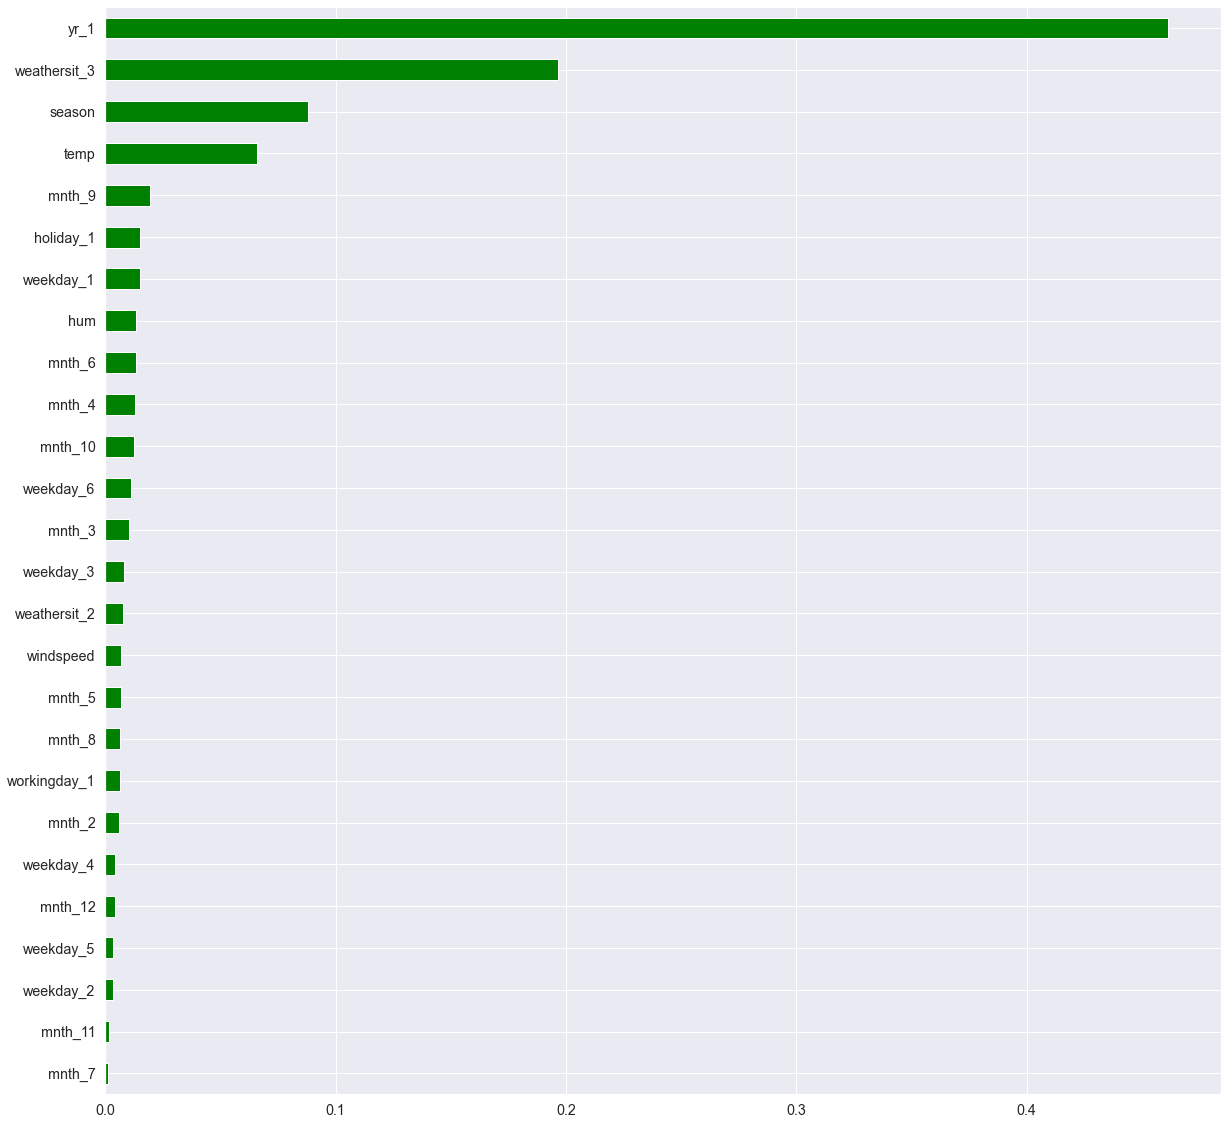

<Figure size 432x288 with 0 Axes>

In [116]:
feat=pd.DataFrame(xg.feature_importances_,index=X.columns)
plt.figure(figsize=(20,20))
feat[0].sort_values(ascending=True).plot(kind='barh',color='green')
plt.show()
plt.savefig('Feature Importance.jpeg',dpi=300)

In [117]:
print(mean_absolute_error(y_test,pred))
print(np.sqrt(mean_squared_error(y_test,pred)))
print(r2_score(y_test,pred))
print(explained_variance_score(y_test,pred))
mean_absolute_percentage_error(y_test,pred)

396.85834196960036
593.2296735914333
0.9047717986182285
0.9055954913969213


15.46292004684503

In [118]:
import pickle

In [160]:
pkl_filename = "xg.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(xg, file)

In [120]:
## Using XGREGRESSOR and making predictions

In [161]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [162]:
test=X[725:]

In [163]:
predictions = pickle_model.predict(test)

In [164]:
predictions

array([ 434.98517, 2108.874  , 3127.0347 , 2182.1594 , 1797.3928 ,
       2754.6611 ], dtype=float32)

In [165]:
comparisions = pd.DataFrame(data.tail(6))

In [166]:
comparisions['predictions'] = predictions

In [167]:
comparisions[['cnt','predictions']]

,cnt,predictions
725,441.0,434.985168
726,2114.0,2108.874023
727,3095.0,3127.034668
728,1341.0,2182.159424
729,1796.0,1797.392822
730,2729.0,2754.661133
